In [133]:
import pandas as pd
import numpy as np

## The data

The dataset contains 100,000 ratings and 3,600 tag applications applied to 9,724 movies by 610 users. 

In [134]:
ratings = pd.read_csv('data/ratings_names.csv')

In [135]:
ratings.head()

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,1,3,4.0,964981247,Grumpier Old Men (1995)
2,1,6,4.0,964982224,Heat (1995)
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,964982931,"Usual Suspects, The (1995)"


In [136]:
# number of users
len(ratings.userId.unique())

610

In [137]:
# number of movies
len(ratings.movieId.unique())

9724

In [138]:
# ratings
np.sort(ratings.rating.unique())

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

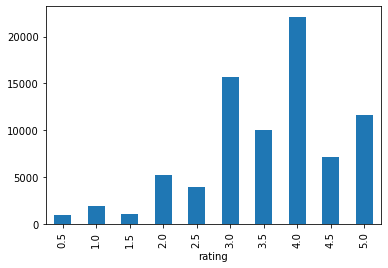

In [222]:
ratings.groupby('rating').rating.count().plot(kind='bar')

In [139]:
# number of ratings
len(ratings)

100836

In [140]:
# list of all movies
list(ratings.title)

['Toy Story (1995)',
 'Grumpier Old Men (1995)',
 'Heat (1995)',
 'Seven (a.k.a. Se7en) (1995)',
 'Usual Suspects, The (1995)',
 'From Dusk Till Dawn (1996)',
 'Bottle Rocket (1996)',
 'Braveheart (1995)',
 'Rob Roy (1995)',
 'Canadian Bacon (1995)',
 'Desperado (1995)',
 'Billy Madison (1995)',
 'Clerks (1994)',
 'Dumb & Dumber (Dumb and Dumber) (1994)',
 'Ed Wood (1994)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Pulp Fiction (1994)',
 'Stargate (1994)',
 'Tommy Boy (1995)',
 'Clear and Present Danger (1994)',
 'Forrest Gump (1994)',
 'Jungle Book, The (1994)',
 'Mask, The (1994)',
 'Blown Away (1994)',
 'Dazed and Confused (1993)',
 'Fugitive, The (1993)',
 'Jurassic Park (1993)',
 'Mrs. Doubtfire (1993)',
 "Schindler's List (1993)",
 'So I Married an Axe Murderer (1993)',
 'Three Musketeers, The (1993)',
 'Tombstone (1993)',
 'Dances with Wolves (1990)',
 'Batman (1989)',
 'Silence of the Lambs, The (1991)',
 'Pinocchio (1940)',
 'Fargo (1996)',
 'Mission: Impossible (1996)',

## A movie recommender system

Suppose a user watches the movie

In [141]:
movie = 'Dark City (1998)' # sci-fi movie; similar to 'the matrix'

the goal is to recommend new movies to this user.

First, let's create a pandas DataFrame that contains the set of user that have rated each movie.

In [142]:
movie_sets = ratings.groupby('title').userId.apply(set)
movie_sets

title
'71 (2014)                                                                               {610}
'Hellboy': The Seeds of Creation (2004)                                                  {332}
'Round Midnight (1986)                                                              {377, 332}
'Salem's Lot (2004)                                                                      {345}
'Til There Was You (1997)                                                           {345, 113}
                                                                   ...                        
eXistenZ (1999)                              {387, 391, 520, 267, 414, 425, 560, 182, 312, ...
xXx (2002)                                   {263, 9, 140, 274, 20, 414, 432, 182, 438, 448...
xXx: State of the Union (2005)                                       {610, 232, 432, 274, 382}
¡Three Amigos! (1986)                        {1, 141, 19, 282, 27, 414, 421, 294, 42, 555, ...
À nous la liberté (Freedom for Us) (1931)   

In [143]:
# keep movies with at least 10 ratings
movie_sets = movie_sets[movie_sets.apply(len)>10]

In [165]:
ratings = ratings[ratings.title.isin(list(movie_sets.index))]

In [211]:
my_ratings = pd.DataFrame(index= movie_sets.index, columns=['title','Jaccard','Serendipity','Correlation'])
my_ratings

,title,Jaccard,Serendipity,Correlation
title,,,,
"'burbs, The (1989)",NaN,NaN,NaN,NaN
(500) Days of Summer (2009),NaN,NaN,NaN,NaN
10 Cloverfield Lane (2016),NaN,NaN,NaN,NaN
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN
"10,000 BC (2008)",NaN,NaN,NaN,NaN
...,...,...,...,...
Zoolander (2001),NaN,NaN,NaN,NaN
Zootopia (2016),NaN,NaN,NaN,NaN
eXistenZ (1999),NaN,NaN,NaN,NaN


In [212]:
my_ratings['title'] = movie_sets.index

In [213]:
my_ratings

,title,Jaccard,Serendipity,Correlation
title,,,,
"'burbs, The (1989)","'burbs, The (1989)",NaN,NaN,NaN
(500) Days of Summer (2009),(500) Days of Summer (2009),NaN,NaN,NaN
10 Cloverfield Lane (2016),10 Cloverfield Lane (2016),NaN,NaN,NaN
10 Things I Hate About You (1999),10 Things I Hate About You (1999),NaN,NaN,NaN
"10,000 BC (2008)","10,000 BC (2008)",NaN,NaN,NaN
...,...,...,...,...
Zoolander (2001),Zoolander (2001),NaN,NaN,NaN
Zootopia (2016),Zootopia (2016),NaN,NaN,NaN
eXistenZ (1999),eXistenZ (1999),NaN,NaN,NaN


## Recommendations based on the Jaccard similarity

The Jaccard similarity between two sets $A$ and $B$ is defined as

$$
J(A,B) = \frac{|A\cap B|}{|A\cup B|}
$$

In [214]:
def Jaccard_sim(set_B):
    set_A = movie_sets[movie]
    return len(set_A.intersection(set_B))/len(set_A.union(set_B))

In [215]:
my_ratings.Jaccard = movie_sets.apply(Jaccard_sim)

In [216]:
# top 20 recommendations
my_ratings.Jaccard.sort_values(ascending=False).head(20)

title
Dark City (1998)                              1.000000
Akira (1988)                                  0.359375
Alien: Resurrection (1997)                    0.309859
Spaceballs (1987)                             0.304878
Batman Returns (1992)                         0.301205
Mystery Men (1999)                            0.298507
Gremlins (1984)                               0.289855
Brazil (1985)                                 0.289157
Unbreakable (2000)                            0.287234
2001: A Space Odyssey (1968)                  0.286885
Close Encounters of the Third Kind (1977)     0.285714
Pi (1998)                                     0.283784
Mad Max (1979)                                0.283582
Total Recall (1990)                           0.283019
RoboCop (1987)                                0.282609
Dark Crystal, The (1982)                      0.281250
Gattaca (1997)                                0.276190
Blade Runner (1982)                           0.274074
Fift

## Recommendations based on the Serendipity similarity

In [217]:
def Serendipity_sim(set_B):
    set_A = movie_sets[movie]
    return len(set_A.intersection(set_B))/len(set_B)

In [218]:
my_ratings.Serendipity = movie_sets.apply(Serendipity_sim)

In [219]:
my_ratings.Serendipity.sort_values(ascending=False).head(20)

title
Dark City (1998)                        1.000000
Fallen (1998)                           0.733333
Zero Effect (1998)                      0.733333
Death to Smoochy (2002)                 0.727273
Michael Collins (1996)                  0.727273
Solaris (Solyaris) (1972)               0.727273
Replacement Killers, The (1998)         0.714286
Mimic (1997)                            0.692308
Ninja Scroll (Jûbei ninpûchô) (1995)    0.692308
Yojimbo (1961)                          0.692308
Brick (2005)                            0.666667
Of Mice and Men (1992)                  0.647059
Universal Soldier (1992)                0.647059
Cape Fear (1962)                        0.642857
Limey, The (1999)                       0.642857
BASEketball (1998)                      0.642857
Saving Silverman (Evil Woman) (2001)    0.636364
Shadow of the Vampire (2000)            0.636364
Blood Simple (1984)                     0.631579
Soylent Green (1973)                    0.631579
Name: Serendip

## Correlation similarity (slow)

In [97]:
ratings

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,1,3,4.0,964981247,Grumpier Old Men (1995)
2,1,6,4.0,964982224,Heat (1995)
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,964982931,"Usual Suspects, The (1995)"
...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017)
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017)
100833,610,168250,5.0,1494273047,Get Out (2017)
100834,610,168252,5.0,1493846352,Logan (2017)


In [99]:
movie_meanrating = ratings.groupby('title').rating.apply(np.mean)

In [100]:
movie_meanrating

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

In [185]:
def correlation_sim(movie_B):
    
    movie_A = movie
    # mean ratings
    mean_A = movie_meanrating[movie_A]
    mean_B = movie_meanrating[movie_B]
    
    # common users
    common_users = list(movie_sets[movie_A].intersection(movie_sets[movie_B]))
    
    # correlation similarity
    den_A = 0
    den_B = 0
    num = 0
    for user in common_users:
        rating_A = ratings[((ratings.userId == user) & (ratings.title == movie_A))].rating.values[0]
        rating_B = ratings[((ratings.userId == user) & (ratings.title == movie_B))].rating.values[0]
        num = num + (rating_A - mean_A)*(rating_B - mean_B)
        den_A = den_A + (rating_A - mean_A)**2
        den_B = den_B + (rating_B - mean_B)**2

    return num/(np.sqrt(den_A)*np.sqrt(den_B))

In [220]:
similarities = my_ratings.title.apply(correlation_sim)

In [224]:
my_ratings.Correlation = similarities
my_ratings

,title,Jaccard,Serendipity,Correlation
title,,,,
"'burbs, The (1989)","'burbs, The (1989)",0.160714,0.529412,0.327024
(500) Days of Summer (2009),(500) Days of Summer (2009),0.071429,0.142857,0.647385
10 Cloverfield Lane (2016),10 Cloverfield Lane (2016),0.016393,0.071429,1.000000
10 Things I Hate About You (1999),10 Things I Hate About You (1999),0.172414,0.277778,0.211226
"10,000 BC (2008)","10,000 BC (2008)",0.065574,0.235294,0.083705
...,...,...,...,...
Zoolander (2001),Zoolander (2001),0.133333,0.222222,0.049219
Zootopia (2016),Zootopia (2016),0.038961,0.093750,0.856376
eXistenZ (1999),eXistenZ (1999),0.206897,0.545455,-0.223940


In [226]:
my_ratings.Correlation.sort_values(ascending=False).head(20)

title
Dark City (1998)                             1.0
Fatal Instinct (1993)                        1.0
Wreck-It Ralph (2012)                        1.0
Polar Express, The (2004)                    1.0
Get Out (2017)                               1.0
The Jungle Book (2016)                       1.0
Rise of the Guardians (2012)                 1.0
Diabolique (1996)                            1.0
Prisoners (2013)                             1.0
Date Night (2010)                            1.0
He's Just Not That Into You (2009)           1.0
Circle of Friends (1995)                     1.0
All Dogs Go to Heaven 2 (1996)               1.0
Bridges of Madison County, The (1995)        1.0
Vicky Cristina Barcelona (2008)              1.0
Walk to Remember, A (2002)                   1.0
Bewitched (2005)                             1.0
Green Hornet, The (2011)                     1.0
Batman v Superman: Dawn of Justice (2016)    1.0
Hotel Transylvania (2012)                    1.0
Name: Correlat